In [13]:
import tensorflow as tf
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

In [14]:
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

In [15]:
%config IPCompleter.greedy=True

In [20]:
fashion_mnist = keras.datasets.fashion_mnist 
(Xf_train_full, yf_train_full), (Xf_test, yf_test) = fashion_mnist.load_data()
Xf_valid, Xf_train = Xf_train_full[:5000] / 255.0, Xf_train_full[5000:] / 255.0
yf_valid, yf_train = yf_train_full[:5000], yf_train_full[5000:]

In [16]:
mnist = fetch_openml('mnist_784', version=1)
Xm, ym = mnist["data"].reshape(-1, 28, 28), mnist["target"]
ym = np.array(ym, dtype='uint8')
Xm_train_full, Xm_test, ym_train_full, ym_test = Xm[:60000], Xm[60000:], ym[:60000], ym[60000:]
Xm_valid, Xm_train = Xm_train_full[:5000] / 255.0, Xm_train_full[5000:] / 255.0
ym_valid, ym_train = ym_train_full[:5000], ym_train_full[5000:]

In [6]:
def plot_history(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
    plt.show()

### MLP Model

In [7]:
mlp_model = keras.models.Sequential([
                                 keras.layers.Flatten(input_shape=[28,28]),
                                 keras.layers.Dense(300, activation="relu"),
                                 keras.layers.Dense(100, activation="relu"),
                                 keras.layers.Dense(10, activation="softmax")
                                 ])

In [8]:
mlp_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [9]:
mlp_model.compile(
    optimizer="sgd",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])

### Training and Evaluation on MNIST data

In [14]:
mlp_history = mlp_model.fit(Xm_train, ym_train, epochs=30, validation_data=(Xm_valid, ym_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 5s 90us/step - loss: 0.6164 - accuracy: 0.8422 - val_loss: 0.2979 - val_accuracy: 0.9180
Epoch 2/30
55000/55000 [==============================] - 3s 58us/step - loss: 0.2837 - accuracy: 0.9190 - val_loss: 0.2346 - val_accuracy: 0.9334
Epoch 3/30
55000/55000 [==============================] - 3s 58us/step - loss: 0.2319 - accuracy: 0.9334 - val_loss: 0.2059 - val_accuracy: 0.9404
Epoch 4/30
55000/55000 [==============================] - 3s 57us/step - loss: 0.1990 - accuracy: 0.9423 - val_loss: 0.1735 - val_accuracy: 0.9508
Epoch 5/30
55000/55000 [==============================] - 3s 58us/step - loss: 0.1744 - accuracy: 0.9501 - val_loss: 0.1553 - val_accuracy: 0.9570
Epoch 6/30
55000/55000 [==============================] - 3s 58us/step - loss: 0.1553 - accuracy: 0.9556 - val_loss: 0.1439 - val_accuracy: 0.9620
Epoch 7/30
55000/55000 [==============================] - 3s 58us/ste

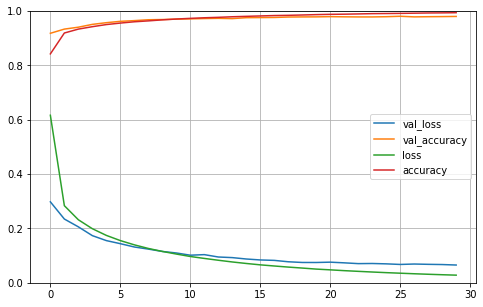

In [15]:
plot_history(mlp_history)

In [16]:
mlp_model.evaluate(Xm_test, ym_test)

10000/10000 [==============================] - 1s 51us/step


[12.42245971186473, 0.9768000245094299]

### Training and Evaluation on Fashion MNIST data

In [20]:
mlp_fashion_history = mlp_model.fit(Xf_train, yf_train, epochs=30, validation_data=(Xf_valid, yf_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 5s 82us/step - loss: 0.6216 - accuracy: 0.7959 - val_loss: 0.4530 - val_accuracy: 0.8492
Epoch 2/30
55000/55000 [==============================] - 5s 82us/step - loss: 0.4332 - accuracy: 0.8471 - val_loss: 0.4011 - val_accuracy: 0.8628
Epoch 3/30
55000/55000 [==============================] - 5s 82us/step - loss: 0.3948 - accuracy: 0.8611 - val_loss: 0.3736 - val_accuracy: 0.8764
Epoch 4/30
55000/55000 [==============================] - 4s 82us/step - loss: 0.3706 - accuracy: 0.8688 - val_loss: 0.3584 - val_accuracy: 0.8774
Epoch 5/30
55000/55000 [==============================] - 5s 85us/step - loss: 0.3507 - accuracy: 0.8762 - val_loss: 0.3735 - val_accuracy: 0.8696
Epoch 6/30
55000/55000 [==============================] - 4s 81us/step - loss: 0.3363 - accuracy: 0.8797 - val_loss: 0.3489 - val_accuracy: 0.8780
Epoch 7/30
55000/55000 [==============================] - 4s 82us/ste

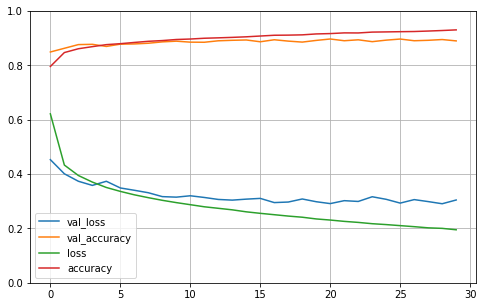

In [21]:
plot_history(mlp_fashion_history)

In [22]:
mlp_model.evaluate(Xf_test, yf_test)

10000/10000 [==============================] - 0s 50us/step


[63.283047476959226, 0.855400025844574]

In [13]:
def build_mlp_model_1(k_initializer='random_uniform', b_initializer='random_uniform', activation='relu', 
                      optimizer="sgd",loss="sparse_categorical_crossentropy",metrics=["accuracy"], 
                      k_regularizer=None, b_regularizer=None):
    model = keras.models.Sequential([
        keras.layers.Flatten(input_shape=[28,28]),
        keras.layers.Dense(300, activation=activation, kernel_initializer=k_initializer, bias_initializer=b_initializer,
                          kernel_regularizer=k_regularizer, bias_regularizer=b_regularizer),
        keras.layers.Dense(100, activation=activation, kernel_initializer=k_initializer, bias_initializer=b_initializer,
                          kernel_regularizer=k_regularizer, bias_regularizer=b_regularizer),
        keras.layers.Dense(10, activation="softmax", kernel_initializer=k_initializer, bias_initializer=b_initializer,
                          kernel_regularizer=k_regularizer, bias_regularizer=b_regularizer)
                                 ])
    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=metrics)
    return model

#### 1. Initializers

In [14]:
from sklearn.model_selection import GridSearchCV
keras_clas = keras.wrappers.scikit_learn.KerasClassifier(build_mlp_model_1)

In [15]:
inits = [keras.initializers.Zeros(), 
         keras.initializers.Ones(), 
         keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None)]
param_distribs= {'k_initializer': inits, 'b_initializer': inits}

grid_search_cv = GridSearchCV(keras_clas, param_distribs, cv=3)
grid_search_cv.fit(Xm_train, ym_train, epochs=5, validation_data=(Xm_valid, ym_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=3)])

Train on 36666 samples, validate on 5000 samples
Epoch 1/5
36666/36666 [==============================] - 2s 68us/step - loss: 2.3020 - accuracy: 0.1108 - val_loss: 2.3013 - val_accuracy: 0.1126
Epoch 2/5
36666/36666 [==============================] - 2s 67us/step - loss: 2.3016 - accuracy: 0.1114 - val_loss: 2.3009 - val_accuracy: 0.1126
Epoch 3/5
36666/36666 [==============================] - 2s 66us/step - loss: 2.3015 - accuracy: 0.1114 - val_loss: 2.3008 - val_accuracy: 0.1126
Epoch 4/5
36666/36666 [==============================] - 2s 66us/step - loss: 2.3015 - accuracy: 0.1114 - val_loss: 2.3008 - val_accuracy: 0.1126
Epoch 5/5
18334/18334 [==============================] - 1s 34us/step
Train on 36667 samples, validate on 5000 samples
Epoch 1/5
36667/36667 [==============================] - 3s 69us/step - loss: 2.3018 - accuracy: 0.1108 - val_loss: 2.3011 - val_accuracy: 0.1126
Epoch 2/5
36667/36667 [==============================] - 2s 66us/step - loss: 2.3013 - accuracy: 0.111

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f61e03ef3d0>,
             iid='warn', n_jobs=None,
             param_grid={'b_initializer': [<keras.initializers.Zeros object at 0x7f61940d68d0>,
                         'k_initializer': [<keras.initializers.Zeros object at 0x7f61940d68d0>,
                                           <keras.initializers.RandomNormal object at 0x7f61940d6950>]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [16]:
inits_df = pd.DataFrame(grid_search_cv.cv_results_)
inits_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_b_initializer,param_k_initializer,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,12.536457,0.323750,0.620950,0.003739,<keras.initializers.Zeros object at 0x7f61940d...,<keras.initializers.Zeros object at 0x7f61940d...,{'b_initializer': <keras.initializers.Zeros ob...,0.114159,0.114384,0.108493,0.112345,0.002726,5
1,12.154297,0.427630,0.612571,0.010585,<keras.initializers.Zeros object at 0x7f61940d...,<keras.initializers.Ones object at 0x7f61940d6...,{'b_initializer': <keras.initializers.Zeros ob...,0.114159,0.114384,0.108493,0.112345,0.002726,5
2,12.156895,0.381608,0.630729,0.006444,<keras.initializers.Zeros object at 0x7f61940d...,<keras.initializers.RandomNormal object at 0x7...,{'b_initializer': <keras.initializers.Zeros ob...,0.922930,0.919926,0.925871,0.922909,0.002427,1
3,12.475698,0.242146,0.633974,0.008485,<keras.initializers.Ones object at 0x7f61940d6...,<keras.initializers.Zeros object at 0x7f61940d...,{'b_initializer': <keras.initializers.Ones obj...,0.252645,0.249332,0.241368,0.247782,0.004733,4
4,12.467256,0.245772,0.623051,0.017444,<keras.initializers.Ones object at 0x7f61940d6...,<keras.initializers.Ones object at 0x7f61940d6...,{'b_initializer': <keras.initializers.Ones obj...,0.114159,0.114384,0.108493,0.112345,0.002726,5
5,12.210135,0.359876,0.625994,0.030082,<keras.initializers.Ones object at 0x7f61940d6...,<keras.initializers.RandomNormal object at 0x7...,{'b_initializer': <keras.initializers.Ones obj...,0.915349,0.910762,0.918180,0.914764,0.003057,3
6,11.291783,1.107483,0.639288,0.022315,<keras.initializers.RandomNormal object at 0x7...,<keras.initializers.Zeros object at 0x7f61940d...,{'b_initializer': <keras.initializers.RandomNo...,0.114159,0.114384,0.108493,0.112345,0.002726,5
7,12.584037,0.300642,0.618860,0.018806,<keras.initializers.RandomNormal object at 0x7...,<keras.initializers.Ones object at 0x7f61940d6...,{'b_initializer': <keras.initializers.RandomNo...,0.114159,0.114384,0.108493,0.112345,0.002726,5
8,12.475256,0.360433,0.635954,0.026016,<keras.initializers.RandomNormal object at 0x7...,<keras.initializers.RandomNormal object at 0x7...,{'b_initializer': <keras.initializers.RandomNo...,0.920039,0.921671,0.926253,0.922655,0.002630,2


In [17]:
grid_search_cv.best_params_

{'b_initializer': <keras.initializers.Zeros at 0x7f61940d68d0>,
 'k_initializer': <keras.initializers.RandomNormal at 0x7f61940d6950>}

In [18]:
est = grid_search_cv.best_estimator_
est.score(Xm_test, ym_test)

10000/10000 [==============================] - 0s 36us/step


0.9383999705314636

#### 2. Activations

In [70]:
activs = ['sigmoid', 'relu', 'tanh']
param_distribs= {'activation': activs}

grid_search_cv2 = GridSearchCV(keras_clas, param_distribs, cv=3)
grid_search_cv2.fit(Xm_train, ym_train, epochs=5, validation_data=(Xm_valid, ym_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=3)])

Train on 36666 samples, validate on 5000 samples
Epoch 1/5
36666/36666 [==============================] - 6s 176us/step - loss: 2.3025 - accuracy: 0.1105 - val_loss: 2.3001 - val_accuracy: 0.1500
Epoch 2/5
36666/36666 [==============================] - 6s 173us/step - loss: 2.2986 - accuracy: 0.1176 - val_loss: 2.2974 - val_accuracy: 0.1126
Epoch 3/5
36666/36666 [==============================] - 6s 167us/step - loss: 2.2933 - accuracy: 0.1284 - val_loss: 2.2881 - val_accuracy: 0.2268
Epoch 4/5
36666/36666 [==============================] - 6s 169us/step - loss: 2.2846 - accuracy: 0.1634 - val_loss: 2.2770 - val_accuracy: 0.2014
Epoch 5/5
18334/18334 [==============================] - 2s 96us/step
Train on 36667 samples, validate on 5000 samples
Epoch 1/5
36667/36667 [==============================] - 6s 175us/step - loss: 2.3018 - accuracy: 0.1098 - val_loss: 2.2990 - val_accuracy: 0.1126
Epoch 2/5
36667/36667 [==============================] - 6s 176us/step - loss: 2.2986 - accuracy:

GridSearchCV(cv=3, error_score=nan,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x000002B74E4099A0>,
             iid='deprecated', n_jobs=None,
             param_grid={'activation': ['sigmoid', 'relu', 'tanh']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [71]:
activs_df = pd.DataFrame(grid_search_cv2.cv_results_)
activs_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,32.375996,0.311839,1.782810,0.016885,sigmoid,{'activation': 'sigmoid'},0.305498,0.215513,0.369225,0.296745,0.063057,3
1,35.606786,0.824242,2.051533,0.017222,relu,{'activation': 'relu'},0.912949,0.907326,0.917417,0.912564,0.004129,1
2,36.166280,0.760547,2.089895,0.008220,tanh,{'activation': 'tanh'},0.908803,0.905526,0.909398,0.907909,0.001703,2


In [72]:
grid_search_cv2.best_params_

{'activation': 'relu'}

In [75]:
est2 = grid_search_cv2.best_estimator_
est2.score(Xm_test, ym_test)

10000/10000 [==============================] - 1s 104us/step


0.9307000041007996

#### 3. Optimizers

In [26]:
optims = [keras.optimizers.SGD(learning_rate=0.001),
          keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9),
          keras.optimizers.Adagrad(learning_rate=0.001),
          keras.optimizers.Adam(learning_rate=0.001)]

param_distribs= {'optimizer': optims}

grid_search_cv3 = GridSearchCV(keras_clas, param_distribs, cv=3)
grid_search_cv3.fit(Xm_train, ym_train, epochs=5, validation_data=(Xm_valid, ym_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=3)])

Train on 36666 samples, validate on 5000 samples
Epoch 1/5
36666/36666 [==============================] - 3s 70us/step - loss: 2.2950 - accuracy: 0.1880 - val_loss: 2.2886 - val_accuracy: 0.2542
Epoch 2/5
36666/36666 [==============================] - 2s 54us/step - loss: 2.2799 - accuracy: 0.2893 - val_loss: 2.2700 - val_accuracy: 0.3078
Epoch 3/5
36666/36666 [==============================] - 2s 53us/step - loss: 2.2563 - accuracy: 0.3701 - val_loss: 2.2388 - val_accuracy: 0.3872
Epoch 4/5
36666/36666 [==============================] - 2s 54us/step - loss: 2.2144 - accuracy: 0.4129 - val_loss: 2.1820 - val_accuracy: 0.4134
Epoch 5/5
18334/18334 [==============================] - 1s 29us/step
Train on 36667 samples, validate on 5000 samples
Epoch 1/5
36667/36667 [==============================] - 2s 54us/step - loss: 2.2949 - accuracy: 0.1270 - val_loss: 2.2867 - val_accuracy: 0.1662
Epoch 2/5
36667/36667 [==============================] - 2s 52us/step - loss: 2.2778 - accuracy: 0.227

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f82e9a434d0>,
             iid='warn', n_jobs=None,
             param_grid={'optimizer': [<keras.optimizers.SGD object at 0x7f82e8725390>,
                                       <keras.optimizers.Adam object at 0x7f82e8725a50>]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [27]:
optims_df = pd.DataFrame(grid_search_cv3.cv_results_)
optims_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_optimizer,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,10.510416,0.369299,0.541016,0.003587,<keras.optimizers.SGD object at 0x7f82e8725390>,{'optimizer': <keras.optimizers.SGD object at ...,0.467983,0.470627,0.494354,0.477655,0.011858,4
1,11.580349,0.058608,0.513869,0.008036,<keras.optimizers.RMSprop object at 0x7f82e872...,{'optimizer': <keras.optimizers.RMSprop object...,0.972837,0.971145,0.971199,0.971727,0.000785,2
2,11.031430,0.039424,0.509604,0.005535,<keras.optimizers.Adagrad object at 0x7f82e872...,{'optimizer': <keras.optimizers.Adagrad object...,0.905858,0.898271,0.906889,0.903673,0.003843,3
3,12.473540,0.349054,0.510408,0.007193,<keras.optimizers.Adam object at 0x7f82e8725a50>,{'optimizer': <keras.optimizers.Adam object at...,0.971365,0.971690,0.973218,0.972091,0.000808,1


In [28]:
grid_search_cv3.best_params_

{'optimizer': <keras.optimizers.Adam at 0x7f82e8725a50>}

In [29]:
est3 = grid_search_cv3.best_estimator_
est3.score(Xm_test, ym_test)

10000/10000 [==============================] - 0s 30us/step


0.9757999777793884

#### 4. Regularizers

In [30]:
reguls = [keras.regularizers.l1(0.1),
          keras.regularizers.l2(0.1),
          keras.regularizers.l1_l2(l1=0.01, l2=0.01)]

param_distribs= {'k_regularizer': reguls, 'b_regularizer': reguls}

grid_search_cv4 = GridSearchCV(keras_clas, param_distribs, cv=3)
grid_search_cv4.fit(Xm_train, ym_train, epochs=5, validation_data=(Xm_valid, ym_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=3)])

Train on 36666 samples, validate on 5000 samples
Epoch 1/5
36666/36666 [==============================] - 4s 100us/step - loss: 25.3265 - accuracy: 0.0995 - val_loss: 15.6360 - val_accuracy: 0.0958
Epoch 2/5
36666/36666 [==============================] - 4s 96us/step - loss: 15.6332 - accuracy: 0.1009 - val_loss: 15.6364 - val_accuracy: 0.0986
Epoch 3/5
36666/36666 [==============================] - 4s 98us/step - loss: 15.6332 - accuracy: 0.1029 - val_loss: 15.6355 - val_accuracy: 0.0958
Epoch 4/5
36666/36666 [==============================] - 4s 97us/step - loss: 15.6332 - accuracy: 0.0990 - val_loss: 15.6351 - val_accuracy: 0.0986
Epoch 5/5
18334/18334 [==============================] - 1s 63us/step
Train on 36667 samples, validate on 5000 samples
Epoch 1/5
36667/36667 [==============================] - 4s 101us/step - loss: 25.3344 - accuracy: 0.1020 - val_loss: 15.6252 - val_accuracy: 0.0986
Epoch 2/5
36667/36667 [==============================] - 4s 98us/step - loss: 15.6332 - ac

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f82e9a434d0>,
             iid='warn', n_jobs=None,
             param_grid={'b_regularizer': [<keras.regularizers.L1L2 object at 0x7f8390d975d0>,
                         'k_regularizer': [<keras.regularizers.L1L2 object at 0x7f8390d975d0>,
                                           <keras.regularizers.L1L2 object at 0x7f8390d97390>]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [31]:
reguls_df = pd.DataFrame(grid_search_cv4.cv_results_)
reguls_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_b_regularizer,param_k_regularizer,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,18.593502,0.145974,1.145094,0.021679,<keras.regularizers.L1L2 object at 0x7f8390d97...,<keras.regularizers.L1L2 object at 0x7f8390d97...,{'b_regularizer': <keras.regularizers.L1L2 obj...,0.114159,0.102656,0.096929,0.104582,0.007165,8
1,18.387894,0.172272,1.156773,0.030864,<keras.regularizers.L1L2 object at 0x7f8390d97...,<keras.regularizers.L1L2 object at 0x7f8390d97...,{'b_regularizer': <keras.regularizers.L1L2 obj...,0.098124,0.098620,0.108493,0.101745,0.004775,9
2,19.365125,0.029791,1.189711,0.026178,<keras.regularizers.L1L2 object at 0x7f8390d97...,<keras.regularizers.L1L2 object at 0x7f8390d97...,{'b_regularizer': <keras.regularizers.L1L2 obj...,0.101069,0.114384,0.108493,0.107982,0.005448,7
3,18.630279,0.150336,1.164648,0.024885,<keras.regularizers.L1L2 object at 0x7f8390d97...,<keras.regularizers.L1L2 object at 0x7f8390d97...,{'b_regularizer': <keras.regularizers.L1L2 obj...,0.114159,0.114384,0.108493,0.112345,0.002726,1
4,18.433165,0.180109,1.230751,0.103386,<keras.regularizers.L1L2 object at 0x7f8390d97...,<keras.regularizers.L1L2 object at 0x7f8390d97...,{'b_regularizer': <keras.regularizers.L1L2 obj...,0.114159,0.114384,0.108493,0.112345,0.002726,1
5,19.209026,0.131314,1.198782,0.011620,<keras.regularizers.L1L2 object at 0x7f8390d97...,<keras.regularizers.L1L2 object at 0x7f8390d97...,{'b_regularizer': <keras.regularizers.L1L2 obj...,0.114159,0.114384,0.108493,0.112345,0.002726,1
6,18.279883,1.408285,1.195355,0.026958,<keras.regularizers.L1L2 object at 0x7f8390d97...,<keras.regularizers.L1L2 object at 0x7f8390d97...,{'b_regularizer': <keras.regularizers.L1L2 obj...,0.114159,0.114384,0.108493,0.112345,0.002726,1
7,19.169538,0.262044,1.209569,0.017994,<keras.regularizers.L1L2 object at 0x7f8390d97...,<keras.regularizers.L1L2 object at 0x7f8390d97...,{'b_regularizer': <keras.regularizers.L1L2 obj...,0.114159,0.114384,0.108493,0.112345,0.002726,1
8,18.517962,1.864314,1.241285,0.019132,<keras.regularizers.L1L2 object at 0x7f8390d97...,<keras.regularizers.L1L2 object at 0x7f8390d97...,{'b_regularizer': <keras.regularizers.L1L2 obj...,0.114159,0.114384,0.108493,0.112345,0.002726,1


In [32]:
grid_search_cv4.best_params_

{'b_regularizer': <keras.regularizers.L1L2 at 0x7f8390d97250>,
 'k_regularizer': <keras.regularizers.L1L2 at 0x7f8390d975d0>}

In [33]:
est4 = grid_search_cv4.best_estimator_
est4.score(Xm_test, ym_test)

10000/10000 [==============================] - 1s 58us/step


0.11349999904632568

Now; first, We will change model's hyper parameters and then we will change the structure of the model and observe the effects of this change.

1. Initializers
2. Activation functions
3. Optimizers
4. Regularizers

Then;

5. Number of Hidden layers
6. Number of Neurons
7. Learning Rate

Then using one of libraries for hyperparameter tuning.

#### Building model with different structure 

In [17]:
def build_mlp_model_2(n_hidden=3, n_neurons=97, learning_rate=3e-3):
    k_initializer = keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None)
    b_initializer = keras.initializers.Zeros()
    
    model = keras.models.Sequential([keras.layers.Flatten(input_shape=[28,28])])
    subtraction = int(n_neurons/n_hidden)
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons-layer*subtraction, activation='relu', 
                                     kernel_initializer=k_initializer, bias_initializer=b_initializer))
    model.add(keras.layers.Dense(10, activation="softmax", 
                                 kernel_initializer=k_initializer, bias_initializer=b_initializer))
    
    optimizer = keras.optimizers.Adam(learning_rate=0.001)
    
    model.compile(loss="sparse_categorical_crossentropy", 
                  metrics=["accuracy"],
                  optimizer=optimizer)
    return model

In [21]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

keras_clas = keras.wrappers.scikit_learn.KerasClassifier(build_mlp_model_2)

param_distribs= {
    'n_hidden': [1, 2, 3],
    'n_neurons':np.arange(1, 100), 
    'learning_rate':reciprocal(3e-4, 3e-2)
    }

rnd_search_cv = RandomizedSearchCV(keras_clas, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(Xf_train, yf_train, epochs=10, validation_data=(Xf_valid, yf_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=3)])

Train on 36666 samples, validate on 5000 samples
Epoch 1/10
36666/36666 [==============================] - 7s 186us/step - loss: 0.6928 - accuracy: 0.7443 - val_loss: 0.4701 - val_accuracy: 0.8400
Epoch 2/10
36666/36666 [==============================] - 5s 144us/step - loss: 0.4542 - accuracy: 0.8393 - val_loss: 0.4042 - val_accuracy: 0.8544
Epoch 3/10
36666/36666 [==============================] - 2s 56us/step - loss: 0.3946 - accuracy: 0.8578 - val_loss: 0.3890 - val_accuracy: 0.8602
Epoch 4/10
36666/36666 [==============================] - 6s 165us/step - loss: 0.3614 - accuracy: 0.8688 - val_loss: 0.3631 - val_accuracy: 0.8678
Epoch 5/10
36666/36666 [==============================] - 6s 158us/step - loss: 0.3391 - accuracy: 0.8773 - val_loss: 0.3400 - val_accuracy: 0.8778
Epoch 6/10
36666/36666 [==============================] - 2s 59us/step - loss: 0.3210 - accuracy: 0.8826 - val_loss: 0.3708 - val_accuracy: 0.8678
Epoch 7/10
36666/36666 [==============================] - 7s 182u

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f6b002a6890>,
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f6b002a6850>,
                                        'n_hidden': [1, 2, 3],
                                        'n_neurons': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return

In [22]:
params_df = pd.DataFrame(rnd_search_cv.cv_results_)
params_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_hidden,param_n_neurons,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,64.843194,7.147386,1.559496,0.020295,0.00682364,3,87,"{'learning_rate': 0.0068236448395058895, 'n_hi...",0.878750,0.881580,0.879561,0.879964,0.001190,2
1,47.030672,4.492470,1.534257,0.025166,0.010984,2,77,"{'learning_rate': 0.010983950530248155, 'n_hid...",0.875477,0.880761,0.872689,0.876309,0.003348,3
2,33.098480,14.029069,1.198951,0.560672,0.00115391,1,22,"{'learning_rate': 0.0011539128289684653, 'n_hi...",0.858514,0.866088,0.864834,0.863145,0.003315,6
3,58.825824,8.579169,1.529390,0.021876,0.0297593,2,54,"{'learning_rate': 0.02975933289359122, 'n_hidd...",0.869914,0.875525,0.871543,0.872327,0.002357,4
4,56.637600,2.335186,1.537436,0.009977,0.0197456,2,22,"{'learning_rate': 0.019745567147119655, 'n_hid...",0.840733,0.851197,0.848143,0.846691,0.004394,7
5,56.831757,5.949237,0.992344,0.438586,0.000803111,2,12,"{'learning_rate': 0.0008031114249482332, 'n_hi...",0.830588,0.852943,0.842906,0.842145,0.009142,9
6,48.951844,3.348276,1.131573,0.490932,0.000421389,1,89,"{'learning_rate': 0.00042138860510843035, 'n_h...",0.880004,0.887962,0.881471,0.883145,0.003458,1
7,59.871607,11.908661,0.826804,0.519855,0.00107887,3,14,"{'learning_rate': 0.0010788748627323355, 'n_hi...",0.829061,0.798233,0.839633,0.822309,0.017563,10
8,55.462281,2.584413,1.491978,0.008405,0.000377879,1,21,"{'learning_rate': 0.0003778787441156093, 'n_hi...",0.864296,0.871925,0.866688,0.867636,0.003186,5
9,62.746475,4.525778,1.397908,0.218211,0.00928811,3,22,"{'learning_rate': 0.009288105413199988, 'n_hid...",0.853933,0.833688,0.839306,0.842309,0.008533,8


In [23]:
rnd_search_cv.best_params_

{'learning_rate': 0.00042138860510843035, 'n_hidden': 1, 'n_neurons': 89}

In [24]:
best_mlp = rnd_search_cv.best_estimator_
best_mlp.score(Xf_test, yf_test)

10000/10000 [==============================] - 0s 23us/step


0.8490999937057495

In [25]:
best_mlp.model.summary()

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_34 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_96 (Dense)             (None, 89)                69865     
_________________________________________________________________
dense_97 (Dense)             (None, 10)                900       
Total params: 70,765
Trainable params: 70,765
Non-trainable params: 0
_________________________________________________________________


In [27]:
best_mlp.fit(Xf_train, yf_train, epochs=30, validation_data=(Xf_valid, yf_valid),
             callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 9s 158us/step - loss: 0.5371 - accuracy: 0.8124 - val_loss: 0.4057 - val_accuracy: 0.8584
Epoch 2/30
55000/55000 [==============================] - 9s 155us/step - loss: 0.3872 - accuracy: 0.8606 - val_loss: 0.3562 - val_accuracy: 0.8744
Epoch 3/30
55000/55000 [==============================] - 6s 108us/step - loss: 0.3474 - accuracy: 0.8747 - val_loss: 0.3321 - val_accuracy: 0.8774
Epoch 4/30
55000/55000 [==============================] - 5s 83us/step - loss: 0.3236 - accuracy: 0.8814 - val_loss: 0.3369 - val_accuracy: 0.8776
Epoch 5/30
55000/55000 [==============================] - 5s 87us/step - loss: 0.3060 - accuracy: 0.8871 - val_loss: 0.3202 - val_accuracy: 0.8812
Epoch 6/30
55000/55000 [==============================] - 5s 99us/step - loss: 0.2880 - accuracy: 0.8952 - val_loss: 0.3279 - val_accuracy: 0.8802
Epoch 7/30
55000/55000 [==============================] - 4s 67us/

In [29]:
best_mlp.model.evaluate(Xf_test, yf_test)

10000/10000 [==============================] - 1s 84us/step


[88.5731869403839, 0.8514999747276306]

In [30]:
best_mlp.model.save("./models/mlp.h5")